# Jupyter Notebook: Parsing Excel file and Visualizing Data

In this notebook, we will load a Excel file, convert it to a pandas DataFrame, and then create visualizations using matplotlib.

In [44]:
pip install pandas matplotlib openpyxl


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load Excel File

In [46]:
# Load the Excel file
file_path = 'Marijuana_Tax_Revenue_2014_To_Date_Report_V2.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, engine='openpyxl')

# Display the first few rows of the DataFrame
df.head(15)


,Revenue Month,Revenue Year,State Sales Tax Total,Medical Marijuana,Retail Marijuana,RMS Tax Total,RMS Local Government Distribution,RMS Marijuana Tax Cash Fund,RMS Public School Fund,RMS General Fund,RME Tax Total,RME Public School Capital Construction Assistance Fund,RME Public School Fund,Total Taxes,License & Other Fees Total,Total Taxes & Fees
0,August,2024,456038.32,394997.07,61041.25,17415046.83,1756485.23,11358315.12,1990274.01,2459782.65,3781977.64,3810125.27,0.0,21653062.79,1428958.52,23082021.31
1,July,2024,457073.82,279161.47,177912.35,17782544.35,1771629.31,11456268.03,2007437.92,2480995.55,3574048.14,3534979.89,0.0,21813666.31,922925.50,22736591.81
2,June,2024,436131.90,319025.08,117106.82,13874663.15,1366723.88,8837855.87,1548623.60,1913946.24,3200142.05,3267645.52,0.0,17510937.10,838565.00,18349502.10
3,May,2024,697134.85,617423.27,79711.58,15567807.93,1640181.33,10606237.62,1858490.35,2296911.03,4858163.97,4744353.58,0.0,21123106.75,976505.00,22099611.75
4,April,2024,448851.79,336143.38,112708.41,17775388.12,1781193.45,11516248.30,2017948.03,2493985.02,4040828.88,4043469.05,0.0,22265068.79,1023906.00,23288974.79
5,March,2024,402599.58,298297.55,104302.03,14666785.05,1420855.32,9297247.28,1629120.99,2013433.09,4334448.69,4329474.36,0.0,19403833.32,1476067.00,20879900.32
6,February,2024,448620.74,323665.87,124954.87,16762606.34,1644542.85,10772945.86,1887702.00,2333013.74,3686373.98,3866521.15,0.0,20897601.06,1105352.00,22002953.06
7,January,2024,7001.12,-74233.38,81234.50,16843986.41,1684965.54,10895850.89,1909238.17,2359630.34,3443568.08,3299656.67,0.0,20294555.61,1252315.00,21546870.61
8,December,2023,429314.94,337360.22,91954.72,13970995.37,1398358.66,9042498.58,1584482.35,1958264.13,3549436.30,3665767.07,0.0,17949746.61,1139412.50,19089159.11
9,November,2023,392269.65,339442.95,52826.70,16706422.53,1678983.96,10857158.51,1902458.25,2351251.03,4063436.00,4003406.24,0.0,21162128.18,962907.42,22125035.60


In [47]:
# Select the relevant columns
columns_needed = [
    'Revenue Month', 'Revenue Year', 'State Sales Tax Total', 'Medical Marijuana',
    'Retail Marijuana', 'RMS Tax Total', 'RMS Local Government Distribution',
    'RMS Marijuana Tax Cash Fund', 'RMS Public School Fund', 'RMS General Fund',
    'RME Tax Total', 'RME Public School Capital Construction Assistance Fund',
    'RME Public School Fund', 'Total Taxes', 'License & Other Fees Total', 'Total Taxes & Fees'
]

# Filter the DataFrame to include only the relevant columns
df = df[columns_needed]

# Check for any missing or non-numeric values and clean the data
df = df.dropna()

# Convert columns with monetary values to numeric (if needed)
monetary_columns = [
    'State Sales Tax Total', 'Medical Marijuana', 'Retail Marijuana',
    'RMS Tax Total', 'RMS Local Government Distribution', 'RMS Marijuana Tax Cash Fund',
    'RMS Public School Fund', 'RMS General Fund', 'RME Tax Total',
    'RME Public School Capital Construction Assistance Fund', 'RME Public School Fund',
    'Total Taxes', 'License & Other Fees Total', 'Total Taxes & Fees'
]

df[monetary_columns] = df[monetary_columns].apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing data after the conversion
df = df.dropna()

# Display the cleaned data
df.head(15)

,Revenue Month,Revenue Year,State Sales Tax Total,Medical Marijuana,Retail Marijuana,RMS Tax Total,RMS Local Government Distribution,RMS Marijuana Tax Cash Fund,RMS Public School Fund,RMS General Fund,RME Tax Total,RME Public School Capital Construction Assistance Fund,RME Public School Fund,Total Taxes,License & Other Fees Total,Total Taxes & Fees
0,August,2024,456038.32,394997.07,61041.25,17415046.83,1756485.23,11358315.12,1990274.01,2459782.65,3781977.64,3810125.27,0.0,21653062.79,1428958.52,23082021.31
1,July,2024,457073.82,279161.47,177912.35,17782544.35,1771629.31,11456268.03,2007437.92,2480995.55,3574048.14,3534979.89,0.0,21813666.31,922925.50,22736591.81
2,June,2024,436131.90,319025.08,117106.82,13874663.15,1366723.88,8837855.87,1548623.60,1913946.24,3200142.05,3267645.52,0.0,17510937.10,838565.00,18349502.10
3,May,2024,697134.85,617423.27,79711.58,15567807.93,1640181.33,10606237.62,1858490.35,2296911.03,4858163.97,4744353.58,0.0,21123106.75,976505.00,22099611.75
4,April,2024,448851.79,336143.38,112708.41,17775388.12,1781193.45,11516248.30,2017948.03,2493985.02,4040828.88,4043469.05,0.0,22265068.79,1023906.00,23288974.79
5,March,2024,402599.58,298297.55,104302.03,14666785.05,1420855.32,9297247.28,1629120.99,2013433.09,4334448.69,4329474.36,0.0,19403833.32,1476067.00,20879900.32
6,February,2024,448620.74,323665.87,124954.87,16762606.34,1644542.85,10772945.86,1887702.00,2333013.74,3686373.98,3866521.15,0.0,20897601.06,1105352.00,22002953.06
7,January,2024,7001.12,-74233.38,81234.50,16843986.41,1684965.54,10895850.89,1909238.17,2359630.34,3443568.08,3299656.67,0.0,20294555.61,1252315.00,21546870.61
8,December,2023,429314.94,337360.22,91954.72,13970995.37,1398358.66,9042498.58,1584482.35,1958264.13,3549436.30,3665767.07,0.0,17949746.61,1139412.50,19089159.11
9,November,2023,392269.65,339442.95,52826.70,16706422.53,1678983.96,10857158.51,1902458.25,2351251.03,4063436.00,4003406.24,0.0,21162128.18,962907.42,22125035.60


## Step 2: Convert Month and Year Columns to a Datetime Object

In [48]:
# Combine 'Revenue Year' and 'Revenue Month' into a 'Date' column
df['Date'] = pd.to_datetime(df['Revenue Year'].astype(str) + '-' + df['Revenue Month'], format='%Y-%B')

# Set the 'Date' column as the index for easy time series plotting
df.set_index('Date', inplace=True)

# Display the DataFrame with the new 'Date' column
df.head(15)

,Revenue Month,Revenue Year,State Sales Tax Total,Medical Marijuana,Retail Marijuana,RMS Tax Total,RMS Local Government Distribution,RMS Marijuana Tax Cash Fund,RMS Public School Fund,RMS General Fund,RME Tax Total,RME Public School Capital Construction Assistance Fund,RME Public School Fund,Total Taxes,License & Other Fees Total,Total Taxes & Fees
Date,,,,,,,,,,,,,,,,
2024-08-01,August,2024,456038.32,394997.07,61041.25,17415046.83,1756485.23,11358315.12,1990274.01,2459782.65,3781977.64,3810125.27,0.0,21653062.79,1428958.52,23082021.31
2024-07-01,July,2024,457073.82,279161.47,177912.35,17782544.35,1771629.31,11456268.03,2007437.92,2480995.55,3574048.14,3534979.89,0.0,21813666.31,922925.50,22736591.81
2024-06-01,June,2024,436131.90,319025.08,117106.82,13874663.15,1366723.88,8837855.87,1548623.60,1913946.24,3200142.05,3267645.52,0.0,17510937.10,838565.00,18349502.10
2024-05-01,May,2024,697134.85,617423.27,79711.58,15567807.93,1640181.33,10606237.62,1858490.35,2296911.03,4858163.97,4744353.58,0.0,21123106.75,976505.00,22099611.75
2024-04-01,April,2024,448851.79,336143.38,112708.41,17775388.12,1781193.45,11516248.30,2017948.03,2493985.02,4040828.88,4043469.05,0.0,22265068.79,1023906.00,23288974.79
2024-03-01,March,2024,402599.58,298297.55,104302.03,14666785.05,1420855.32,9297247.28,1629120.99,2013433.09,4334448.69,4329474.36,0.0,19403833.32,1476067.00,20879900.32
2024-02-01,February,2024,448620.74,323665.87,124954.87,16762606.34,1644542.85,10772945.86,1887702.00,2333013.74,3686373.98,3866521.15,0.0,20897601.06,1105352.00,22002953.06
2024-01-01,January,2024,7001.12,-74233.38,81234.50,16843986.41,1684965.54,10895850.89,1909238.17,2359630.34,3443568.08,3299656.67,0.0,20294555.61,1252315.00,21546870.61
2023-12-01,December,2023,429314.94,337360.22,91954.72,13970995.37,1398358.66,9042498.58,1584482.35,1958264.13,3549436.30,3665767.07,0.0,17949746.61,1139412.50,19089159.11


## Step 3: Plot Line Graphs by Month

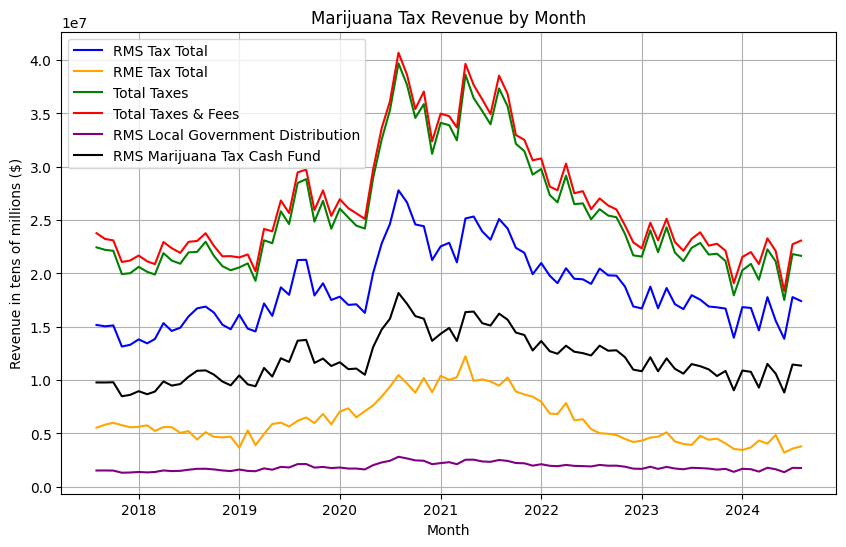

In [49]:
# Plot data by month
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RMS Tax Total'], label='RMS Tax Total', color='blue')
plt.plot(df.index, df['RME Tax Total'], label='RME Tax Total', color='orange')
plt.plot(df.index, df['Total Taxes'], label='Total Taxes', color='green')
plt.plot(df.index, df['Total Taxes & Fees'], label='Total Taxes & Fees', color='red')
plt.plot(df.index, df['RMS Local Government Distribution'], label='RMS Local Government Distribution', color='purple')
plt.plot(df.index, df['RMS Marijuana Tax Cash Fund'], label='RMS Marijuana Tax Cash Fund', color='black')
plt.title('Marijuana Tax Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue in tens of millions ($)')
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Plot Line Graphs by Quarter

/var/folders/y7/rgrhl49d54770g___dv9bqnm0000gn/T/ipykernel_12229/3085463809.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').sum()


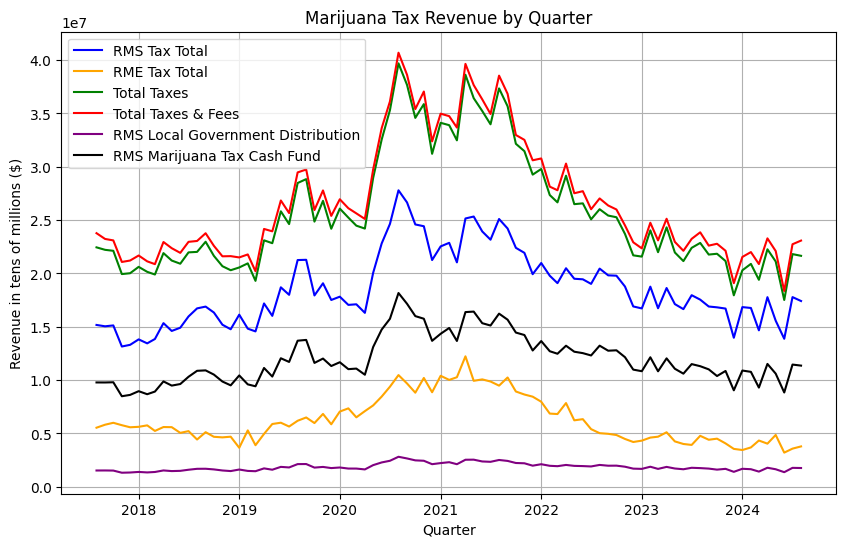

In [50]:
# Resample data by quarter and plot
df_quarterly = df.resample('Q').sum()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RMS Tax Total'], label='RMS Tax Total', color='blue')
plt.plot(df.index, df['RME Tax Total'], label='RME Tax Total', color='orange')
plt.plot(df.index, df['Total Taxes'], label='Total Taxes', color='green')
plt.plot(df.index, df['Total Taxes & Fees'], label='Total Taxes & Fees', color='red')
plt.plot(df.index, df['RMS Local Government Distribution'], label='RMS Local Government Distribution', color='purple')
plt.plot(df.index, df['RMS Marijuana Tax Cash Fund'], label='RMS Marijuana Tax Cash Fund', color='black')
plt.title('Marijuana Tax Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue in tens of millions ($)')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Plot Line Graphs by Year

/var/folders/y7/rgrhl49d54770g___dv9bqnm0000gn/T/ipykernel_12229/3445078584.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').sum()


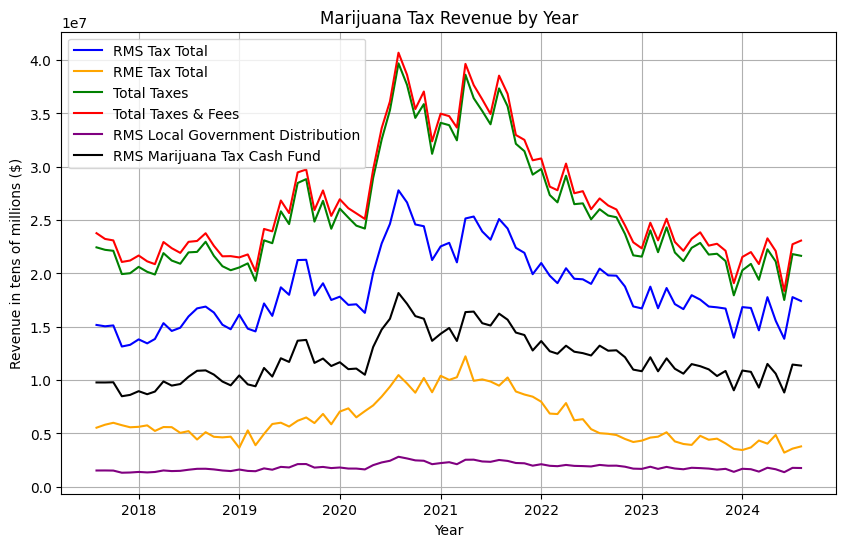

In [51]:
# Resample data by year and plot
df_yearly = df.resample('Y').sum()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['RMS Tax Total'], label='RMS Tax Total', color='blue')
plt.plot(df.index, df['RME Tax Total'], label='RME Tax Total', color='orange')
plt.plot(df.index, df['Total Taxes'], label='Total Taxes', color='green')
plt.plot(df.index, df['Total Taxes & Fees'], label='Total Taxes & Fees', color='red')
plt.plot(df.index, df['RMS Local Government Distribution'], label='RMS Local Government Distribution', color='purple')
plt.plot(df.index, df['RMS Marijuana Tax Cash Fund'], label='RMS Marijuana Tax Cash Fund', color='black')
plt.title('Marijuana Tax Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue in tens of millions ($)')
plt.legend()
plt.grid(True)
plt.show()